#Nama

In [ ]:
# Dimas Aditiya
# SIB-B
# Bart and Homer Classification Dataset

#Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Define Dataset

In [4]:
train_path = "/content/gdrive/MyDrive/Dataset/Homer and Bart dataset/train"
val_path = "/content/gdrive/MyDrive/Dataset/Homer and Bart dataset/val"

#Load Dataset and image sizing

In [5]:
# Define Batch and image size
batch_size = 32
img_height = 180
img_width = 180

In [6]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_path, image_size=(img_height, img_width), batch_size=batch_size)

Found 269 files belonging to 2 classes.


In [7]:
val_data = tf.keras.utils.image_dataset_from_directory(
    val_path, image_size=(img_height, img_width), batch_size=batch_size)

Found 228 files belonging to 2 classes.


#Check Class Name

In [8]:
class_names = train_data.class_names
print(class_names)

['Bart', 'Homer']


In [9]:
print(val_data.class_names)

['Bart', 'Homer']


#Visualing Images

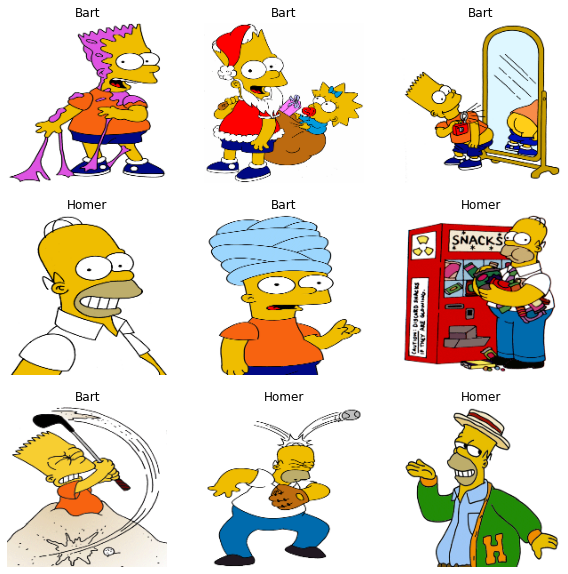

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


#Cache Dataset

In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)

#Create Model

In [13]:
# Define Number of classes
num_classes = len(class_names)

In [44]:
model = Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),

    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Dropout(0.2),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes)
])

#Compile Model

In [45]:
model.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_5 (RandomFlip)  (None, 180, 180, 3)       0         
                                                                 
 random_rotation_5 (RandomRo  (None, 180, 180, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_5 (RandomZoom)  (None, 180, 180, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                 

#Training Model

In [47]:
epochs= 30 
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs
)

Epoch 1/30
9/9 [==============================] - 3s 171ms/step - loss: 0.9070 - accuracy: 0.4833 - val_loss: 0.6927 - val_accuracy: 0.5219
Epoch 2/30
9/9 [==============================] - 1s 84ms/step - loss: 0.6628 - accuracy: 0.5874 - val_loss: 0.6819 - val_accuracy: 0.5219
Epoch 3/30
9/9 [==============================] - 1s 76ms/step - loss: 0.6324 - accuracy: 0.5985 - val_loss: 0.6236 - val_accuracy: 0.5219
Epoch 4/30
9/9 [==============================] - 1s 76ms/step - loss: 0.5602 - accuracy: 0.6617 - val_loss: 0.5471 - val_accuracy: 0.7412
Epoch 5/30
9/9 [==============================] - 1s 83ms/step - loss: 0.5178 - accuracy: 0.7695 - val_loss: 0.4123 - val_accuracy: 0.8421
Epoch 6/30
9/9 [==============================] - 1s 84ms/step - loss: 0.4690 - accuracy: 0.7695 - val_loss: 0.3826 - val_accuracy: 0.8728
Epoch 7/30
9/9 [==============================] - 1s 80ms/step - loss: 0.4142 - accuracy: 0.8327 - val_loss: 0.3535 - val_accuracy: 0.8377
Epoch 8/30
9/9 [==========

#Visualize Performance

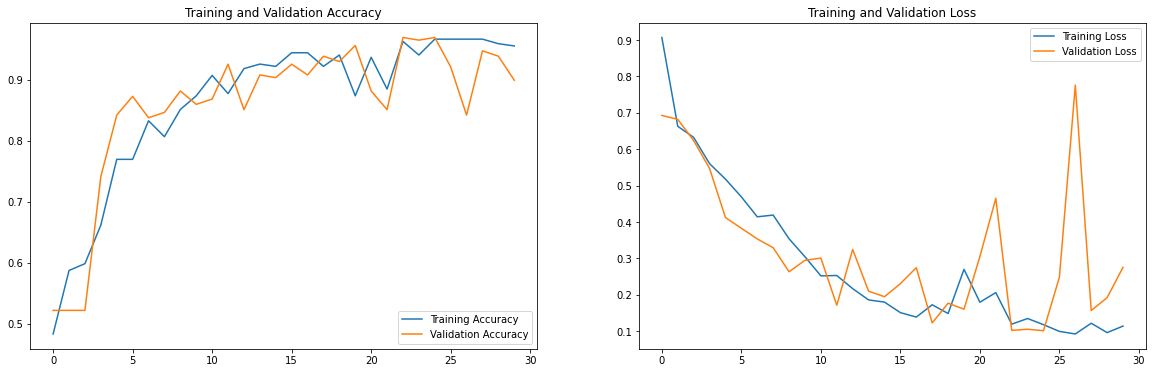

In [48]:
# Accuracy and Loss Visualization

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

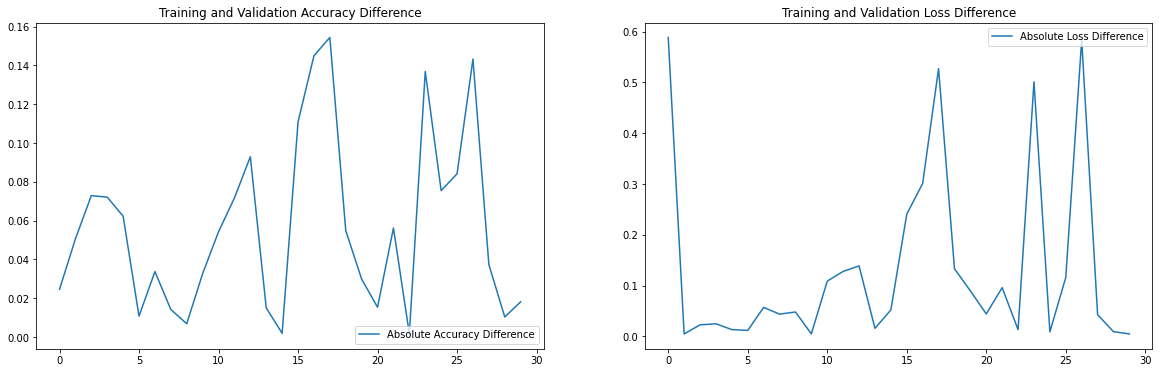

In [43]:
acc_difference = abs(np.array(acc) - np.array(val_acc))
loss_difference = abs(np.array(loss) - np.array(val_loss))

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_difference, label='Absolute Accuracy Difference')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy Difference')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_difference, label='Absolute Loss Difference')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss Difference')
plt.show()

#Predicting Image

This image most likely belongs to Homer with a 90.47 percent confidence.


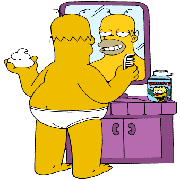

In [57]:
image_path = "/content/gdrive/MyDrive/Dataset/Homer and Bart dataset/val/Homer/homer5.bmp"

img = tf.keras.utils.load_img(
    image_path, target_size=(img_height, img_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

img